# Scipy

In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Scipy:
# We have the min and max temperatures in a city In India for each months of the year.
# We would like to find a function to describe this and show it graphically, the dataset
# given below.

In [53]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [54]:
# Fitting to a perodic function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,temp_min, [-40, 20, 0])

print(res_max)
print(res_min)

[ 39.10062829 -11.08724928   2.10332481]
[24.87112259 -7.8989966   1.60673367]


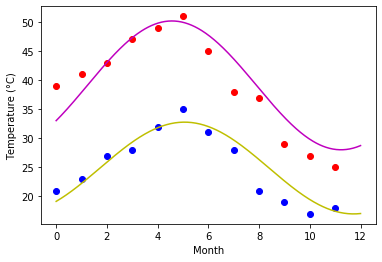

In [55]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.show()


# Matplotlib

In [56]:
import pandas as pd

In [57]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5, 1.0, 'Male/Female proportion')

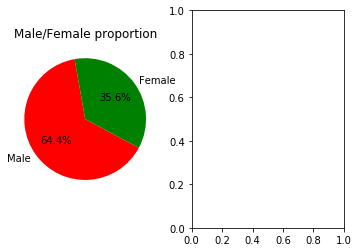

In [58]:
# Create a pie chart presenting the male/female proportion

f,(x, y) = plt.subplots(1,2)
x.pie(titanic['sex'].value_counts(), labels=["Male","Female"], colors=["red","green"],startangle=100,autopct='%.1f%%')      
x.set_title('Male/Female proportion')

<Figure size 432x288 with 0 Axes>

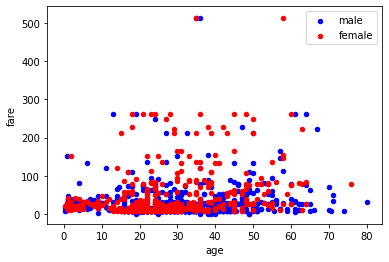

In [59]:
# Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

plt.figure()
category1 = titanic[titanic.sex=='male'].plot.scatter('age', 'fare', color='blue',label='male')
titanic[titanic.sex=='female'].plot.scatter('age', 'fare',color='red',label='female',ax=category1)